In [1]:
#Install mlxtend if not already installed
#!pip install mlxten


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler   
import matplotlib.pyplot as plt

In [3]:
dataset1=pd.read_csv("prep.csv",index_col=None)

In [4]:
df2=dataset1

df2 = pd.get_dummies(df2, drop_first=True)

df2


,age,bp,al,su,bgr,bu,sc,sod,pot,hrmo,...,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_yes,pe_yes,ane_yes,classification_yes
0,2.000000,76.459948,3.0,0.0,148.112676,57.482105,3.077356,137.528754,4.627244,12.518156,...,0,0,0,0,0,0,1,1,0,1
1,3.000000,76.459948,2.0,0.0,148.112676,22.000000,0.700000,137.528754,4.627244,10.700000,...,1,0,0,0,0,0,1,0,0,1
2,4.000000,76.459948,1.0,0.0,99.000000,23.000000,0.600000,138.000000,4.400000,12.000000,...,1,0,0,0,0,0,1,0,0,1
3,5.000000,76.459948,1.0,0.0,148.112676,16.000000,0.700000,138.000000,3.200000,8.100000,...,1,0,0,0,0,0,1,0,1,1
4,5.000000,50.000000,0.0,0.0,148.112676,25.000000,0.600000,137.528754,4.627244,11.800000,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,51.492308,70.000000,0.0,0.0,219.000000,36.000000,1.300000,139.000000,3.700000,12.500000,...,1,0,0,0,0,0,1,0,0,1
395,51.492308,70.000000,0.0,2.0,220.000000,68.000000,2.800000,137.528754,4.627244,8.700000,...,1,0,0,1,1,0,1,0,1,1
396,51.492308,70.000000,3.0,0.0,110.000000,115.000000,6.000000,134.000000,2.700000,9.100000,...,1,0,0,1,1,0,0,0,0,1
397,51.492308,90.000000,0.0,0.0,207.000000,80.000000,6.800000,142.000000,5.500000,8.500000,...,1,0,0,1,1,0,1,0,1,1


In [5]:
indep_X=df2.drop('classification_yes', axis=1)#drop output column separately using drop_function
dep_Y=df2['classification_yes']

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(indep_X, dep_Y, test_size=0.2, random_state=42)


In [7]:
# Create a StandardScaler 
scaler = StandardScaler()
# Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
log_model=LogisticRegression(solver='lbfgs')
RF=RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
DT=DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
SVM=SVC(kernel='linear',random_state=0)
SVM_NL=SVC(kernel='rbf',random_state=0)    

In [9]:
#verbose is used to see the model result is training section , we will verbose with or without in the function 
#sfs = SequentialFeatureSelector(log_model, k_features='best',forward=True,floating=False,verbose=2,scoring='accuracy',cv=5)
sfs = SequentialFeatureSelector(log_model, k_features='best',forward=True,floating=False,scoring='accuracy',cv=5)


In [10]:
#sfs1=sfs.fit(X_train_scaled, y_train)

In [11]:
#selected_features_idx = list(sfs1.k_feature_idx_) 

In [12]:
#selected_features_idx

[0, 1, 2, 3, 6, 9, 13, 14, 15, 22, 24, 25]

In [13]:
#selected_features_names = list(sfs1.k_feature_names_) 

In [14]:
#selected_features_names

['0', '1', '2', '3', '6', '9', '13', '14', '15', '22', '24', '25']

In [15]:
#selected_features_score = sfs1.k_score_

In [16]:
#selected_features_score

0.9968253968253968

In [17]:
#sf=sfs1.get_metric_dict()

In [18]:
#sf

{1: {'feature_idx': (9,),
  'cv_scores': array([0.859375  , 0.890625  , 0.96875   , 0.890625  , 0.93650794]),
  'avg_score': 0.9091765873015873,
  'feature_names': ('9',),
  'ci_bound': 0.04966120293095398,
  'std_dev': 0.03863810303456746,
  'std_err': 0.01931905151728373},
 2: {'feature_idx': (2, 9),
  'cv_scores': array([0.921875  , 0.953125  , 0.984375  , 0.921875  , 0.95238095]),
  'avg_score': 0.9467261904761906,
  'feature_names': ('2', '9'),
  'ci_bound': 0.03000826645661299,
  'std_dev': 0.023347450782684742,
  'std_err': 0.011673725391342371},
 3: {'feature_idx': (2, 9, 22),
  'cv_scores': array([0.9375    , 0.96875   , 1.        , 0.96875   , 0.98412698]),
  'avg_score': 0.9718253968253968,
  'feature_names': ('2', '9', '22'),
  'ci_bound': 0.026604505632860223,
  'std_dev': 0.02069920922486275,
  'std_err': 0.010349604612431375},
 4: {'feature_idx': (2, 6, 9, 22),
  'cv_scores': array([0.953125, 0.96875 , 1.      , 0.96875 , 1.      ]),
  'avg_score': 0.978125,
  'feature_n

In [19]:
#results=pd.DataFrame.from_dict(sfs1.get_metric_dict()).T

In [20]:
#results

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(9,)","[0.859375, 0.890625, 0.96875, 0.890625, 0.9365...",0.909177,"(9,)",0.0496612,0.0386381,0.0193191
2,"(2, 9)","[0.921875, 0.953125, 0.984375, 0.921875, 0.952...",0.946726,"(2, 9)",0.0300083,0.0233475,0.0116737
3,"(2, 9, 22)","[0.9375, 0.96875, 1.0, 0.96875, 0.984126984126...",0.971825,"(2, 9, 22)",0.0266045,0.0206992,0.0103496
4,"(2, 6, 9, 22)","[0.953125, 0.96875, 1.0, 0.96875, 1.0]",0.978125,"(2, 6, 9, 22)",0.0240992,0.01875,0.009375
5,"(2, 6, 9, 14, 22)","[1.0, 0.96875, 1.0, 0.984375, 0.9523809523809523]",0.981101,"(2, 6, 9, 14, 22)",0.0237167,0.0184524,0.00922619
6,"(2, 6, 9, 13, 14, 22)","[0.96875, 1.0, 1.0, 0.96875, 0.9841269841269841]",0.984325,"(2, 6, 9, 13, 14, 22)",0.0179629,0.0139758,0.00698789
7,"(2, 6, 9, 13, 14, 15, 22)","[0.984375, 1.0, 1.0, 0.984375, 0.9682539682539...",0.987401,"(2, 6, 9, 13, 14, 15, 22)",0.0152337,0.0118524,0.00592618
8,"(2, 6, 9, 13, 14, 15, 22, 24)","[0.984375, 1.0, 1.0, 1.0, 0.9841269841269841]",0.9937,"(2, 6, 9, 13, 14, 15, 22, 24)",0.00991705,0.00771581,0.0038579
9,"(0, 2, 6, 9, 13, 14, 15, 22, 24)","[0.984375, 1.0, 1.0, 1.0, 0.9841269841269841]",0.9937,"(0, 2, 6, 9, 13, 14, 15, 22, 24)",0.00991705,0.00771581,0.0038579
10,"(0, 1, 2, 6, 9, 13, 14, 15, 22, 24)","[0.984375, 1.0, 1.0, 1.0, 0.9841269841269841]",0.9937,"(0, 1, 2, 6, 9, 13, 14, 15, 22, 24)",0.00991705,0.00771581,0.0038579


In [21]:
#verbose is used to see the model result is training section , we will verbose with or without in the function 
#sfs = SequentialFeatureSelector(log_model, k_features='best',forward=True,floating=False,verbose=2,scoring='accuracy',cv=5)

In [22]:
def LOG_SFS(log_model,X_train_scaled,y_train):
    
    sfs = SequentialFeatureSelector(log_model, k_features='best',forward=True,floating=False,scoring='accuracy',cv=5)
    sfs1=sfs.fit(X_train_scaled, y_train)
    selected_features_idx = list(sfs1.k_feature_idx_) 
    selected_features_names = list(sfs1.k_feature_names_) 
    selected_features_score = sfs1.k_score_
    sf=sfs1.get_metric_dict()
    results=pd.DataFrame.from_dict((sf)).T
    return selected_features_idx,selected_features_names, selected_features_score,sf,results


def RF_SFS(RF,X_train_scaled,y_train):
    
    sfs = SequentialFeatureSelector(RF, k_features='best',forward=True,floating=False,scoring='accuracy',cv=5)
    sfs_1=sfs.fit(X_train_scaled, y_train)
    selected_features_idx = list(sfs_1.k_feature_idx_) 
    selected_features_names = list(sfs_1.k_feature_names_) 
    selected_features_score = sfs_1.k_score_
    sfd=sfs_1.get_metric_dict()
    results=pd.DataFrame.from_dict((sfd)).T
    return selected_features_idx,selected_features_names, selected_features_score,sfd,results


def DT_SFS(DT,X_train_scaled,y_train):
    
    sfs = SequentialFeatureSelector(DT, k_features='best',forward=True,floating=False,scoring='accuracy',cv=5)
    sfs2=sfs.fit(X_train_scaled, y_train)
    selected_features_idx = list(sfs2.k_feature_idx_) 
    selected_features_names = list(sfs2.k_feature_names_) 
    selected_features_score = sfs2.k_score_
    sfn=sfs2.get_metric_dict()
    results=pd.DataFrame.from_dict((sfn)).T
    return selected_features_idx,selected_features_names, selected_features_score,sfn,results


def SVM_SFS(SVM,X_train_scaled,y_train):
    
    sfs = SequentialFeatureSelector(SVM, k_features='best',forward=True,floating=False,scoring='accuracy',cv=5)
    sfs3=sfs.fit(X_train_scaled, y_train)
    selected_features_idx = list(sfs3.k_feature_idx_) 
    selected_features_names = list(sfs3.k_feature_names_) 
    selected_features_score = sfs3.k_score_
    sfe=sfs3.get_metric_dict()
    results=pd.DataFrame.from_dict((sfe)).T
    return selected_features_idx,selected_features_names, selected_features_score,sfe,results


def SVM_NL_SFS(SVM_NL,X_train_scaled,y_train):
    
    sfs = SequentialFeatureSelector(SVM_NL, k_features='best',forward=True,floating=False,scoring='accuracy',cv=5)
    sfs4=sfs.fit(X_train_scaled, y_train)
    selected_features_idx = list(sfs4.k_feature_idx_) 
    selected_features_names = list(sfs4.k_feature_names_) 
    selected_features_score = sfs4.k_score_
    sfa=sfs4.get_metric_dict()
    results=pd.DataFrame.from_dict((sfa)).T
    return selected_features_idx,selected_features_names, selected_features_score,sfa,results




In [23]:
selected_features_idx,selected_features_names, selected_features_score,sf,results=LOG_SFS(log_model,X_train_scaled,y_train)

In [24]:
#results

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(9,)","[0.859375, 0.890625, 0.96875, 0.890625, 0.9365...",0.909177,"(9,)",0.0496612,0.0386381,0.0193191
2,"(2, 9)","[0.921875, 0.953125, 0.984375, 0.921875, 0.952...",0.946726,"(2, 9)",0.0300083,0.0233475,0.0116737
3,"(2, 9, 22)","[0.9375, 0.96875, 1.0, 0.96875, 0.984126984126...",0.971825,"(2, 9, 22)",0.0266045,0.0206992,0.0103496
4,"(2, 6, 9, 22)","[0.953125, 0.96875, 1.0, 0.96875, 1.0]",0.978125,"(2, 6, 9, 22)",0.0240992,0.01875,0.009375
5,"(2, 6, 9, 14, 22)","[1.0, 0.96875, 1.0, 0.984375, 0.9523809523809523]",0.981101,"(2, 6, 9, 14, 22)",0.0237167,0.0184524,0.00922619
6,"(2, 6, 9, 13, 14, 22)","[0.96875, 1.0, 1.0, 0.96875, 0.9841269841269841]",0.984325,"(2, 6, 9, 13, 14, 22)",0.0179629,0.0139758,0.00698789
7,"(2, 6, 9, 13, 14, 15, 22)","[0.984375, 1.0, 1.0, 0.984375, 0.9682539682539...",0.987401,"(2, 6, 9, 13, 14, 15, 22)",0.0152337,0.0118524,0.00592618
8,"(2, 6, 9, 13, 14, 15, 22, 24)","[0.984375, 1.0, 1.0, 1.0, 0.9841269841269841]",0.9937,"(2, 6, 9, 13, 14, 15, 22, 24)",0.00991705,0.00771581,0.0038579
9,"(0, 2, 6, 9, 13, 14, 15, 22, 24)","[0.984375, 1.0, 1.0, 1.0, 0.9841269841269841]",0.9937,"(0, 2, 6, 9, 13, 14, 15, 22, 24)",0.00991705,0.00771581,0.0038579
10,"(0, 1, 2, 6, 9, 13, 14, 15, 22, 24)","[0.984375, 1.0, 1.0, 1.0, 0.9841269841269841]",0.9937,"(0, 1, 2, 6, 9, 13, 14, 15, 22, 24)",0.00991705,0.00771581,0.0038579


In [25]:
log_result= results[["feature_idx","feature_names","avg_score"]]

In [26]:
log_result


,feature_idx,feature_names,avg_score
1,"(9,)","(9,)",0.909177
2,"(2, 9)","(2, 9)",0.946726
3,"(2, 9, 22)","(2, 9, 22)",0.971825
4,"(2, 6, 9, 22)","(2, 6, 9, 22)",0.978125
5,"(2, 6, 9, 14, 22)","(2, 6, 9, 14, 22)",0.981101
6,"(2, 6, 9, 13, 14, 22)","(2, 6, 9, 13, 14, 22)",0.984325
7,"(2, 6, 9, 13, 14, 15, 22)","(2, 6, 9, 13, 14, 15, 22)",0.987401
8,"(2, 6, 9, 13, 14, 15, 22, 24)","(2, 6, 9, 13, 14, 15, 22, 24)",0.9937
9,"(0, 2, 6, 9, 13, 14, 15, 22, 24)","(0, 2, 6, 9, 13, 14, 15, 22, 24)",0.9937
10,"(0, 1, 2, 6, 9, 13, 14, 15, 22, 24)","(0, 1, 2, 6, 9, 13, 14, 15, 22, 24)",0.9937


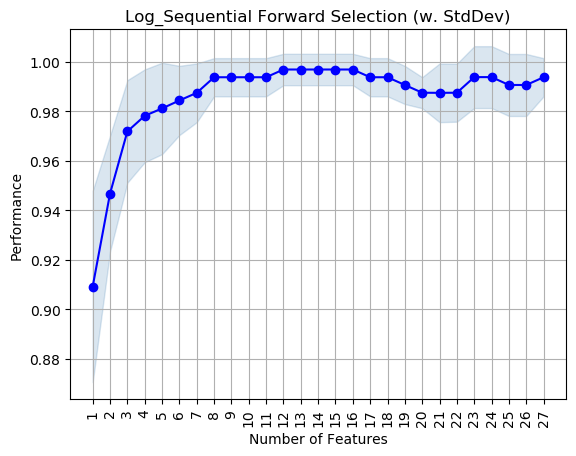

In [27]:
# plotting graph
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# Assuming sfs1 is your SequentialFeatureSelector instance
fig = plot_sfs(sf, kind='std_dev')

# Rotate x-axis labels for better visibility
plt.xticks(rotation='vertical')

plt.title('Log_Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()


In [28]:
selected_features_idx,selected_features_names,selected_features_score,sfd,results=RF_SFS(RF,X_train_scaled,y_train)
results
RF_result= results[["feature_idx","feature_names","avg_score"]]

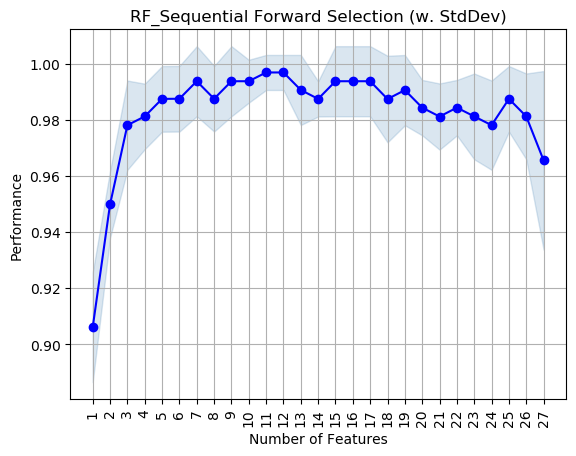

In [29]:
# plotting graph
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# Assuming sfs1 is your SequentialFeatureSelector instance
fig = plot_sfs( sfd ,kind='std_dev')

# Rotate x-axis labels for better visibility
plt.xticks(rotation='vertical')

plt.title('RF_Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()


In [30]:
selected_features_idx,selected_features_names, selected_features_score,sfn,results=DT_SFS(DT,X_train_scaled,y_train)
results
DT_result= results[["feature_idx","feature_names","avg_score"]]

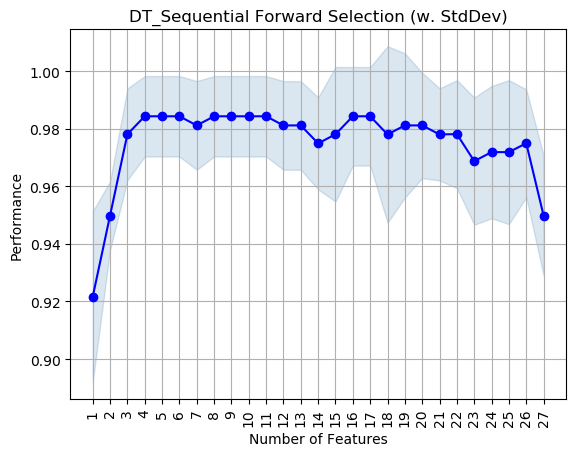

In [31]:
# plotting graph
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# Assuming sfs1 is your SequentialFeatureSelector instance
fig = plot_sfs(sfn, kind='std_dev')

# Rotate x-axis labels for better visibility
plt.xticks(rotation='vertical')

plt.title('DT_Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()


In [32]:
selected_features_idx,selected_features_names, selected_features_score,sfe,results=SVM_SFS(SVM,X_train_scaled,y_train)
results
SVM_L_result= results[["feature_idx","feature_names","avg_score"]]

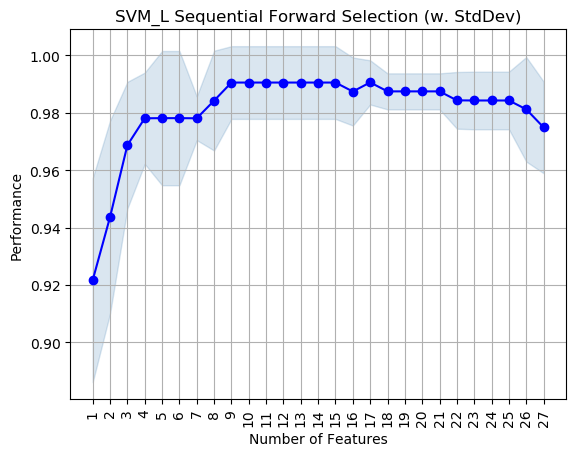

In [33]:
# plotting graph
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# Assuming sfs1 is your SequentialFeatureSelector instance
fig = plot_sfs(sfe, kind='std_dev')

# Rotate x-axis labels for better visibility
plt.xticks(rotation='vertical')

plt.title('SVM_L Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()


In [34]:
selected_features_idx,selected_features_names, selected_features_score,sfa,results=SVM_NL_SFS(SVM_NL,X_train_scaled,y_train)
results
SVM_NL_result= results[["feature_idx","feature_names","avg_score"]]

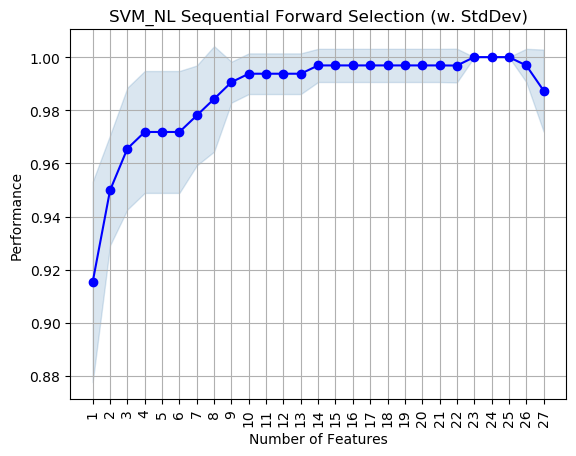

In [35]:
# plotting graph
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# Assuming sfs1 is your SequentialFeatureSelector instance
fig = plot_sfs(sfa, kind='std_dev')

# Rotate x-axis labels for better visibility
plt.xticks(rotation='vertical')

plt.title('SVM_NL Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()


In [36]:
# Combine the two DataFrames vertically (along rows)
#combined_results = pd.concat([log_result,RF_result,DT_result,SVM_L_result,SVM_NL_result], ignore_index=True)


In [38]:
# Print or use the combined_results DataFrame
#combined_results

,feature_idx,feature_names,avg_score
0,"(9,)","(9,)",0.909177
1,"(2, 9)","(2, 9)",0.946726
2,"(2, 9, 22)","(2, 9, 22)",0.971825
3,"(2, 6, 9, 22)","(2, 6, 9, 22)",0.978125
4,"(2, 6, 9, 14, 22)","(2, 6, 9, 14, 22)",0.981101
...,...,...,...
130,"(0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14...","(0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1
131,"(0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14...","(0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1
132,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",1
133,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.996875
